### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from time import time
from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from fvcore.nn import FlopCountAnalysis, flop_count_table
from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training

In [2]:
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
# Set model to training mode
model.train()

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1)

# Training loop
for epoch in range(50):
    # Initialize the hist matrix at each epoch
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)
        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_basic/bisenet.pth')

100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 0, Loss: 0.47643551230430603, mIoU: 0.23940108678793942


100%|██████████| 393/393 [01:50<00:00,  3.56it/s]


Epoch: 1, Loss: 0.31246522068977356, mIoU: 0.355811795657581


100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 2, Loss: 0.28488683700561523, mIoU: 0.4318007679901611


100%|██████████| 393/393 [01:54<00:00,  3.45it/s]


Epoch: 3, Loss: 0.33050256967544556, mIoU: 0.48520927063260383


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 4, Loss: 0.31396302580833435, mIoU: 0.5195359003271665


100%|██████████| 393/393 [01:53<00:00,  3.46it/s]


Epoch: 5, Loss: 0.2740110158920288, mIoU: 0.5475078156494253


100%|██████████| 393/393 [01:53<00:00,  3.47it/s]


Epoch: 6, Loss: 0.4260234832763672, mIoU: 0.5690245390601475


100%|██████████| 393/393 [01:52<00:00,  3.48it/s]


Epoch: 7, Loss: 0.3056105077266693, mIoU: 0.585228178036334


100%|██████████| 393/393 [01:51<00:00,  3.51it/s]


Epoch: 8, Loss: 0.29680174589157104, mIoU: 0.5968409981971373


100%|██████████| 393/393 [01:50<00:00,  3.57it/s]


Epoch: 9, Loss: 0.1910531222820282, mIoU: 0.6139549018909056


100%|██████████| 393/393 [01:51<00:00,  3.53it/s]


Epoch: 10, Loss: 0.24988825619220734, mIoU: 0.6199691778524948


100%|██████████| 393/393 [01:50<00:00,  3.55it/s]


Epoch: 11, Loss: 0.2905636727809906, mIoU: 0.6249006867389552


100%|██████████| 393/393 [01:55<00:00,  3.41it/s]


Epoch: 12, Loss: 0.216493621468544, mIoU: 0.6356426036460748


100%|██████████| 393/393 [01:57<00:00,  3.35it/s]


Epoch: 13, Loss: 0.2534606158733368, mIoU: 0.6411119141361428


100%|██████████| 393/393 [01:50<00:00,  3.55it/s]


Epoch: 14, Loss: 0.22608372569084167, mIoU: 0.6475798883009712


100%|██████████| 393/393 [01:52<00:00,  3.50it/s]


Epoch: 15, Loss: 0.2469271719455719, mIoU: 0.6507772923184351


100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 16, Loss: 0.1648380160331726, mIoU: 0.6553443461119063


100%|██████████| 393/393 [01:51<00:00,  3.53it/s]


Epoch: 17, Loss: 0.2103348821401596, mIoU: 0.6593569619919617


100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 18, Loss: 0.16238151490688324, mIoU: 0.659418677373323


100%|██████████| 393/393 [01:50<00:00,  3.56it/s]


Epoch: 19, Loss: 0.19748803973197937, mIoU: 0.6680649098847686


100%|██████████| 393/393 [01:53<00:00,  3.45it/s]


Epoch: 20, Loss: 0.17143957316875458, mIoU: 0.6666022165983858


100%|██████████| 393/393 [01:50<00:00,  3.55it/s]


Epoch: 21, Loss: 0.12550689280033112, mIoU: 0.6722421476559893


100%|██████████| 393/393 [01:55<00:00,  3.41it/s]


Epoch: 22, Loss: 0.25358089804649353, mIoU: 0.675751453865701


100%|██████████| 393/393 [01:55<00:00,  3.40it/s]


Epoch: 23, Loss: 0.22025324404239655, mIoU: 0.6788699519692462


100%|██████████| 393/393 [01:50<00:00,  3.57it/s]


Epoch: 24, Loss: 0.20308050513267517, mIoU: 0.6805194452787786


100%|██████████| 393/393 [01:49<00:00,  3.59it/s]


Epoch: 25, Loss: 0.1557183712720871, mIoU: 0.6815416948625301


100%|██████████| 393/393 [01:52<00:00,  3.50it/s]


Epoch: 26, Loss: 0.1733991950750351, mIoU: 0.6841922344151482


100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 27, Loss: 0.17546992003917694, mIoU: 0.6872975909494463


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 28, Loss: 0.21076419949531555, mIoU: 0.6902982205862337


100%|██████████| 393/393 [01:50<00:00,  3.57it/s]


Epoch: 29, Loss: 0.16629008948802948, mIoU: 0.6899048844691336


100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


Epoch: 30, Loss: 0.1856703907251358, mIoU: 0.6930058828161754


100%|██████████| 393/393 [01:50<00:00,  3.57it/s]


Epoch: 31, Loss: 0.1836107224225998, mIoU: 0.6949951695569648


100%|██████████| 393/393 [01:49<00:00,  3.58it/s]


Epoch: 32, Loss: 0.21609161794185638, mIoU: 0.6962997566188093


100%|██████████| 393/393 [01:52<00:00,  3.51it/s]


Epoch: 33, Loss: 0.19770275056362152, mIoU: 0.6975935912765259


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 34, Loss: 0.18863950669765472, mIoU: 0.6982732153064547


100%|██████████| 393/393 [01:52<00:00,  3.48it/s]


Epoch: 35, Loss: 0.13319772481918335, mIoU: 0.6998991912228216


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 36, Loss: 0.15453778207302094, mIoU: 0.7011597304776087


100%|██████████| 393/393 [01:54<00:00,  3.42it/s]


Epoch: 37, Loss: 0.14444765448570251, mIoU: 0.70377279353887


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 38, Loss: 0.19664710760116577, mIoU: 0.7043533118885321


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 39, Loss: 0.18986918032169342, mIoU: 0.7046068812606804


100%|██████████| 393/393 [01:53<00:00,  3.46it/s]


Epoch: 40, Loss: 0.12381158769130707, mIoU: 0.7065225639766606


100%|██████████| 393/393 [01:53<00:00,  3.46it/s]


Epoch: 41, Loss: 0.11468110233545303, mIoU: 0.7087709481723031


100%|██████████| 393/393 [01:54<00:00,  3.43it/s]


Epoch: 42, Loss: 0.11984152346849442, mIoU: 0.7086220949271078


100%|██████████| 393/393 [01:54<00:00,  3.45it/s]


Epoch: 43, Loss: 0.18502293527126312, mIoU: 0.7096509176530015


100%|██████████| 393/393 [01:55<00:00,  3.42it/s]


Epoch: 44, Loss: 0.2049742490053177, mIoU: 0.7101073750004452


100%|██████████| 393/393 [01:53<00:00,  3.46it/s]


Epoch: 45, Loss: 0.16231222450733185, mIoU: 0.7119147697490384


100%|██████████| 393/393 [01:54<00:00,  3.43it/s]


Epoch: 46, Loss: 0.13419631123542786, mIoU: 0.713617995598646


100%|██████████| 393/393 [01:54<00:00,  3.44it/s]


Epoch: 47, Loss: 0.15662693977355957, mIoU: 0.7132938936733221


100%|██████████| 393/393 [01:54<00:00,  3.42it/s]


Epoch: 48, Loss: 0.16907541453838348, mIoU: 0.7153351142632048


100%|██████████| 393/393 [01:54<00:00,  3.45it/s]


Epoch: 49, Loss: 0.14930135011672974, mIoU: 0.7163553047888643


### Evaluation

In [2]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_basic/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))

# Print the mIoU
print(f'mIoU: {miou}')

100%|██████████| 500/500 [00:16<00:00, 30.25it/s]

mIoU: 0.5574518259482943


### Example

0it [00:00, ?it/s]


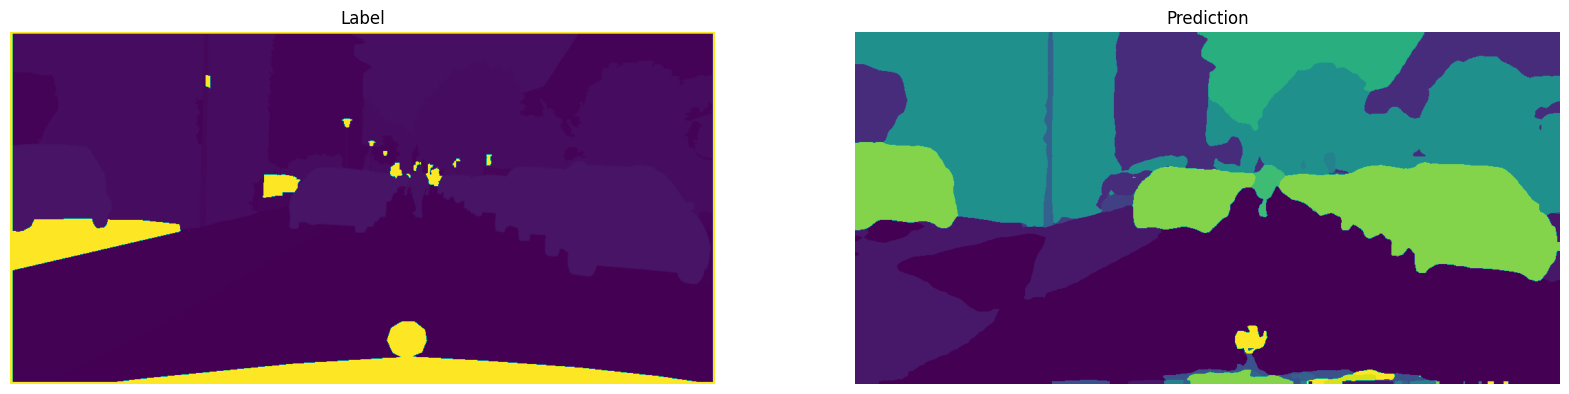

In [4]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_basic/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

hist = np.zeros((19, 19))
for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### FLOPs and Parameters

In [3]:
# Get the device
device = torch.device("cuda")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_basic/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
# Get the image and label
image, label = dataset[0]

# Compute the number of flops
flops = FlopCountAnalysis(model, image.unsqueeze(0).to(device))
# Get the number of flops
flops = flop_count_table(flops)
# Get the number of parameters
params = sum(p.numel() for p in model.parameters())

print(f'Number of parameters: {params}\n')
print(flops)

Number of parameters: 50801192

| module                                      | #parameters or shape   | #flops     |
|:--------------------------------------------|:-----------------------|:-----------|
| model                                       | 50.801M                | 91.923G    |
|  saptial_path                               |  0.371M                |  5.088G    |
|   saptial_path.convblock1                   |   1.856K               |   0.243G   |
|    saptial_path.convblock1.conv1            |    1.728K              |    0.226G  |
|    saptial_path.convblock1.bn               |    0.128K              |    16.777M |
|   saptial_path.convblock2                   |   73.984K              |   2.424G   |
|    saptial_path.convblock2.conv1            |    73.728K             |    2.416G  |
|    saptial_path.convblock2.bn               |    0.256K              |    8.389M  |
|   saptial_path.convblock3                   |   0.295M               |   2.42G    |
|    saptial_path.conv

### Latency and FPS

In [6]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_basic/bisenet.pth'))
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')

# Get the image and label
image, label = dataset[0]

# Compute the latency and FPS
iterations = 1000
latency = []
fps = []

# Run the model for a number of iterations
for _ in range(iterations):
    start = time()
    model(image.unsqueeze(0).to(device))
    end = time()
    latency.append(end - start)
    fps.append(1 / (end - start))

# Compute the average latency and FPS
mean_latency = np.mean(latency)
mean_fps = np.mean(fps)
std_latency = np.std(latency)
std_fps = np.std(fps)

# Print the results
print(f'Latency: {mean_latency:.3f} +/- {std_latency:.3f}')
print(f'FPS: {mean_fps:.3f} +/- {std_fps:.3f}')

Latency: 0.018 +/- 0.000
FPS: 55.477 +/- 3.168
